<a href="https://colab.research.google.com/github/ximenacamarillo678-sketch/Estadistica2025B/blob/main/Student_Performance_ximena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

67038.49590000001
3690854.6496
185901.9608
coeficiente de correlacion= 0.3737
coeficiente de correlacion (forma facil)=                                   Hours_Studied  Previous Scores  Sleep Hours  \
Hours_Studied                          1.000000        -0.012390     0.001245   
Previous Scores                       -0.012390         1.000000     0.005944   
Sleep Hours                            0.001245         0.005944     1.000000   
Sample Question Papers Practiced       0.017463         0.007888     0.003990   
Performance_Index                      0.373730         0.915189     0.048106   

                                  Sample Question Papers Practiced  \
Hours_Studied                                             0.017463   
Previous Scores                                           0.007888   
Sleep Hours                                               0.003990   
Sample Question Papers Practiced                          1.000000   
Performance_Index                          

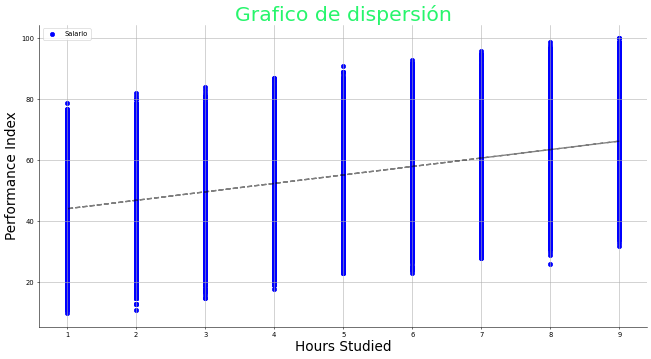


Coeficiente de determinafion= 0.1397

 intervalo de confianza:                        0          1
const          40.620341  42.138008
Hours_Studied   2.638143   2.907983


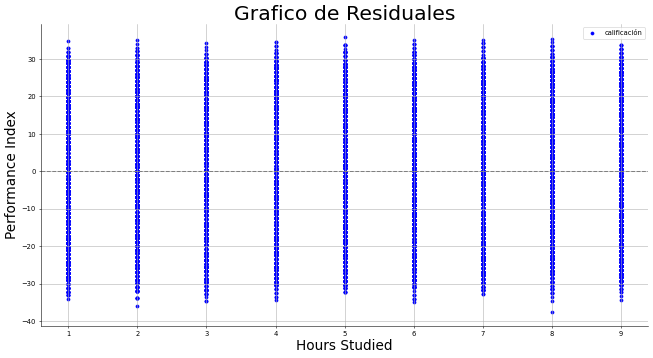

valor_p(shapiro)=  2.3269507843403982e-45
valor_p de Breusch-Pagan: 0.9742

x=70, [235.49357235]
x=80, [263.22420059]
x=84, [274.31645189]

Ultimo paso


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10000.
  res = hypotest_fun_out(*samples, **kwds)


,df,sum_sq,mean_sq,F,PR(>F)
Performance_Index,1.0,9363.560018,9363.560018,1623.181225,0.0
Residual,9998.0,57674.935882,5.768647,NaN,NaN


In [9]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/ximenacamarillo678-sketch/Estadistica2025B/refs/heads/main/Student_Performance%20(1).csv")
# Rename columns to remove spaces for easier use in formulas
df.rename(columns={'Hours Studied': 'Hours_Studied', 'Performance Index': 'Performance_Index'}, inplace=True)

#Establesca una variable dependiente ( Y ) y una variable independiente ( X ).
x= df ["Hours_Studied"]
y= df ["Performance_Index"]
#grafico de dispersion
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8), dpi=49)
plt.scatter(x, y, label="Salario", color="blue", s=40)
plt.xlabel("Hours Studied", fontsize= 20)
plt.ylabel("Performance Index", fontsize= 20)
plt.title("Grafico de dispersión", color= "#27F56C", fontsize= 30)
plt.gca().spines[["top","right"]].set_visible(False)
plt.grid()
plt.legend()
#plt.show()
#¿Los datos soportan la suposición de linealidad? no soporto la linealidad
#Calcule el coeficiente de correlación e interprete el resultado.
Sxx=((x - x.mean())**2).sum()
print(Sxx)
Syy= ((y - y.mean())**2).sum()
print(Syy)
Sxy= ((x - x.mean())*(y-y.mean())).sum()
print(Sxy)
from math import sqrt
r= Sxy/sqrt(Sxx*Syy)
print("coeficiente de correlacion=", round(r,4))
print("coeficiente de correlacion (forma facil)=", df.select_dtypes(include=['number']).corr())
from scipy.stats import pearsonr

print("coeficiente de correlacion", pearsonr(x,y))
# "~" significa depende de ejemplo x~y
#r= coeficiente de correlacion
# r**2 = coeficiente de determinacion
#Calcule el coeficiente de determinación e interprete el resultado.
print(r**2)
r= pearsonr(x,y)
print(r)

#Obtenga la recta de regresión ajustada y grafíquelo sobre el gráfico de
#dispersión.

import statsmodels.api as sm
x_constante=sm.add_constant(x)
x
x_constante
modelo=sm.OLS(y,x_constante).fit()
modelo.params
#respuesta y=24.53 + 0.643x
print("parametros:", modelo.params)
yc=modelo.predict(x_constante)
plt.plot(x, yc, color="black", linestyle="--", linewidth=2, alpha=0.5)
plt.show()

from sklearn.metrics import r2_score
r2=r2_score(y,yc)
print("\nCoeficiente de determinafion=", round(r2,4))
#7
intervalo_de_confianza=modelo.conf_int(alpha=0.05)
intervalo_de_confianza

print("\n intervalo de confianza:", intervalo_de_confianza)
#8
import matplotlib.pyplot as plt
residuales=modelo.resid
plt.figure(figsize=(16,8), dpi=49)
plt.scatter(x,residuales, label="calificación", color="blue",s=20)
plt.xlabel("Hours Studied", fontsize=20)
plt.ylabel("Performance Index", fontsize=20)
plt.title("Grafico de Residuales", fontsize=30,)
plt.gca().spines[["top","right"]].set_visible(False)
plt.grid()
plt.legend()

plt.axhline(y=0,color="gray", linestyle="--")
plt.show()



#el test de shapiro es para menores de 30 y el test de breusch pagan para mas de
#30

#9.tes de shapiro
#H0: hay normalidad
#Hi: no hay normalidad
# sig.: 0.05

from scipy.stats import shapiro
estadistico_shapiro, valor_p_shapiro= shapiro(residuales)
print("valor_p(shapiro)= ", valor_p_shapiro)

#hay normalidad, por lo tanto se acepta la hippteis nula

#10.tes de breusch-pagan
#H0: hay homostedscidad
#Hi: no hay homocedasticidad
#sig.: 0.05

from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f'valor_p de Breusch-Pagan: {valor_p_bp:0.4f}\n')

#comoes mayor el valor pe que el nivel de significancia si hya homocedasticidad
#por lo tanto se acepta la hipotesis nula

#11
modelo.params
#f(70)= 24.52 + 0.64(70)= 69.53
print("x=70,", modelo.predict([1,70]))
#f(80)= 24.52 + 0.64(80)= 75.72
print("x=80,", modelo.predict([1,80]))
#f(84)= 24.52 + 0.64(84)= 78.28
print("x=84,", modelo.predict([1,84]))

#12
print("\nUltimo paso")
from statsmodels.formula.api import ols
modelo_lineal=ols("Hours_Studied ~ Performance_Index", data=df).fit()
tabla_anova=sm.stats.anova_lm(modelo_lineal)
tabla_anova